##  Práctica: Predicción del precio de automóviles con Regresión Lineal Múltiple

###  Contexto

Una empresa automovilística china, **Geely Auto**, desea establecerse en el mercado estadounidense. Para ello, necesita **comprender qué factores influyen en el precio de los coches**. Tu tarea será construir un modelo predictivo con **Python y scikit-learn** que estime el precio de un automóvil a partir de sus características técnicas.

El conjunto de datos `CarPrice_Assignment.csv` contiene información de 205 modelos de coches vendidos en EE. UU., con variables como el tipo de combustible, tamaño del motor, peso, potencia, número de puertas, entre otros.

---

###  Objetivos de aprendizaje

* Aplicar el flujo completo de un **proyecto de Machine Learning supervisado**.
* Limpiar, analizar y preparar datos para su uso en un modelo predictivo.
* Entrenar y evaluar un modelo de **regresión lineal múltiple**.
* Interpretar los coeficientes y evaluar el rendimiento del modelo.
* Representar gráficamente los resultados y comunicar conclusiones.

---

###  Conocimientos previos

* Python y bibliotecas: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`.
* Conceptos básicos de regresión lineal y normalización de variables.




---

###  Desarrollo paso a paso

#### **Paso 1: Cargar y explorar los datos**

In [15]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir datos de entrenamiento y de testeo
from sklearn.model_selection import train_test_split

# Normalización Z-score
from sklearn.preprocessing import StandardScaler

# Modelo
from sklearn.linear_model import LinearRegression

# Metricas
from sklearn.metrics import r2_score, mean_squared_error


# Cargar los datos
df = pd.read_csv("dataset/CarPrice_Assignment.csv")

# Explorar datos
df.info()
df.describe()

#Valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* Comprueba número de filas y columnas.
* Identifica valores nulos o erróneos.
* Observa qué columnas podrían ser **variables categóricas** y cuáles **numéricas**.


#### **Paso 2: Limpieza de datos**

1. Extrae el nombre de la compañía de `CarName`.
2. Corrige errores ortográficos comunes (`vokswagen`, `toyouta`, etc.).
3. Elimina duplicados, si los hubiera.
4. Convierte todas las cadenas de texto a minúsculas.

In [16]:
# Extraer nombre de la compañia
df["Compañia"] = df["CarName"].str.split(" ").str[0]

# Corregir errores ortográficos
correcciones = {
    "vokswagen": "volkswagen",
    "toyouta": "toyota",
    "maxda": "mazda",
    "vw": "volkswagen",
    "porcshe": "porsche",
    "alfa": "alfa-romero"
}

df["Compañia"] = df["Compañia"].str.lower()
df["Compañia"] = df["Compañia"].replace(correcciones)

# Eliminar duplicados
df = df.drop_duplicates()

# Convertir cadenas de texto a minúsculas
for columna in df.select_dtypes(include=['object']).columns:
    df[columna] = df[columna].str.lower()

#### **Paso 3: Análisis exploratorio**

* Visualiza la distribución de los precios.
* Muestra histogramas y diagramas de caja de las variables principales:

  * `fueltype`, `carbody`, `drivewheel`, `enginetype`
  * `horsepower`, `enginesize`, `curbweight`, `carwidth`
* Calcula la **matriz de correlación** y representa el **heatmap**.

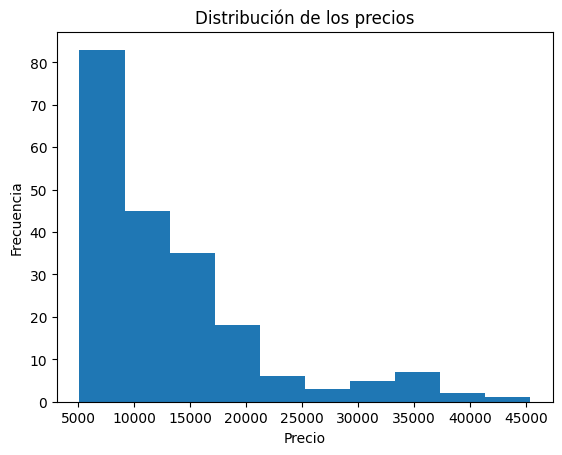

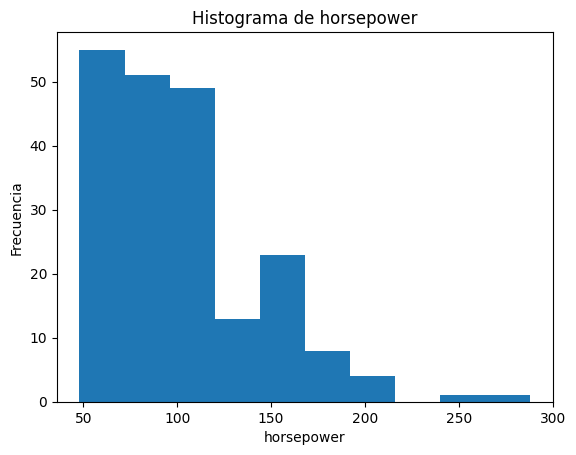

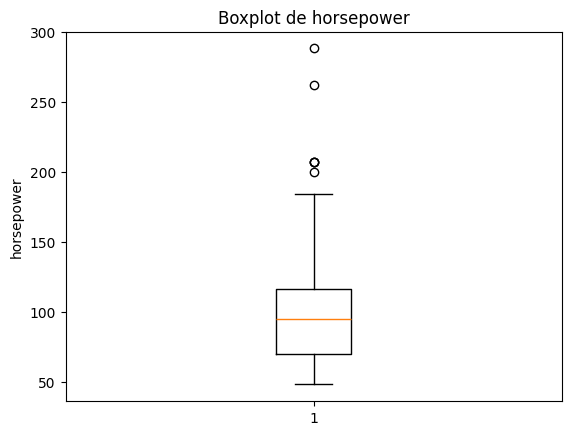

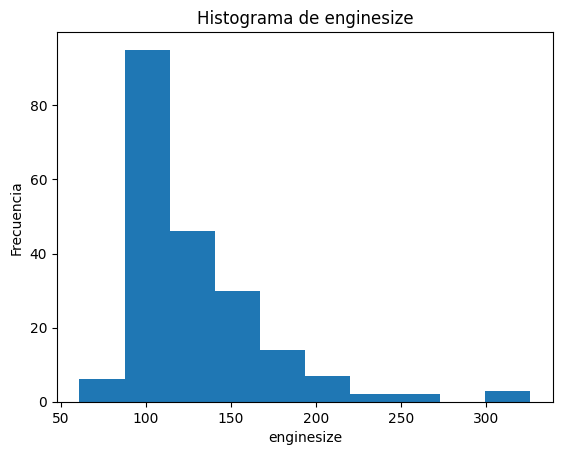

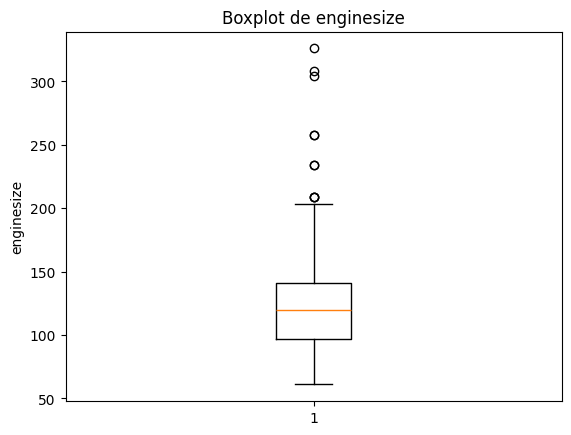

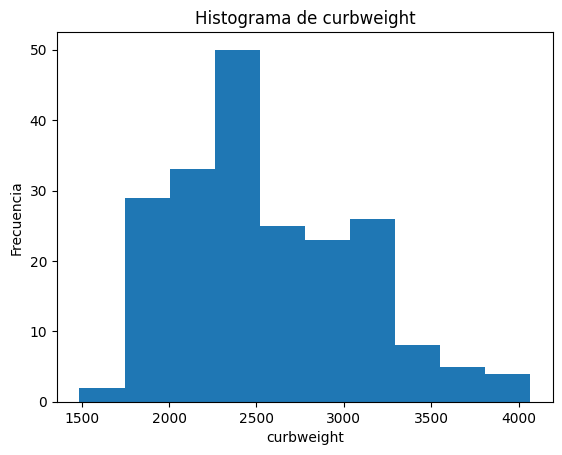

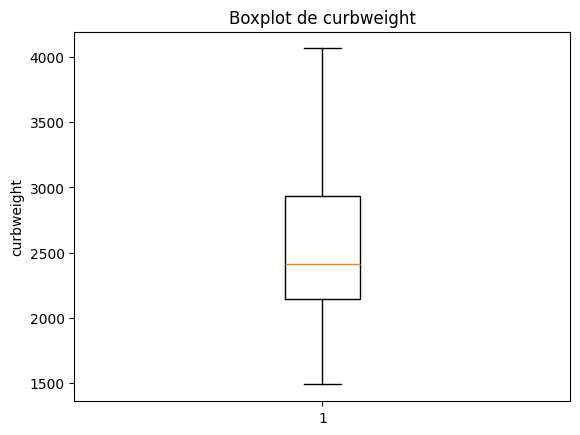

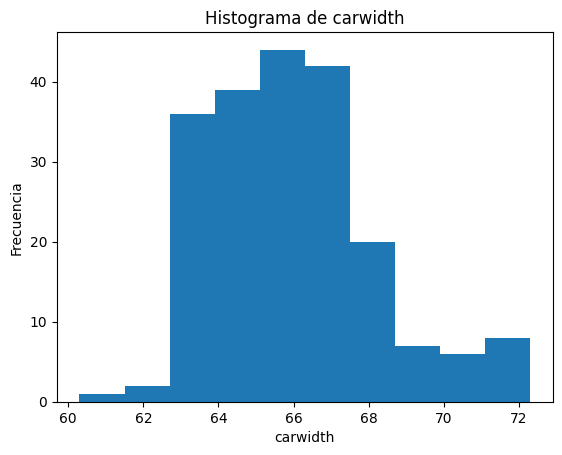

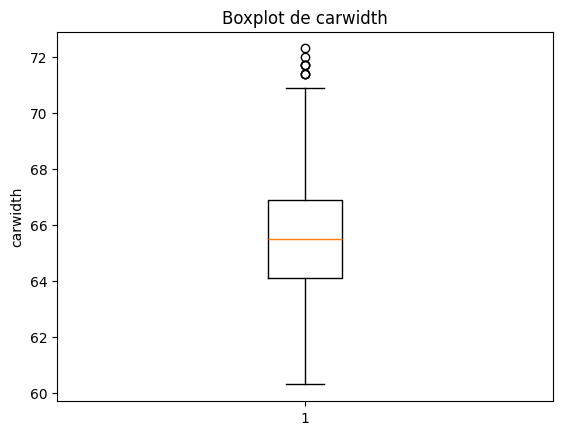

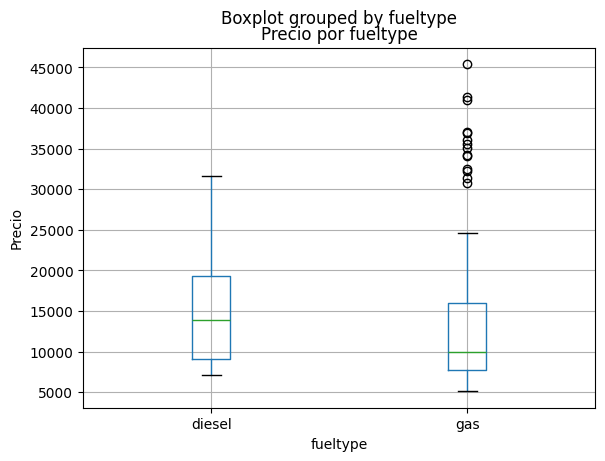

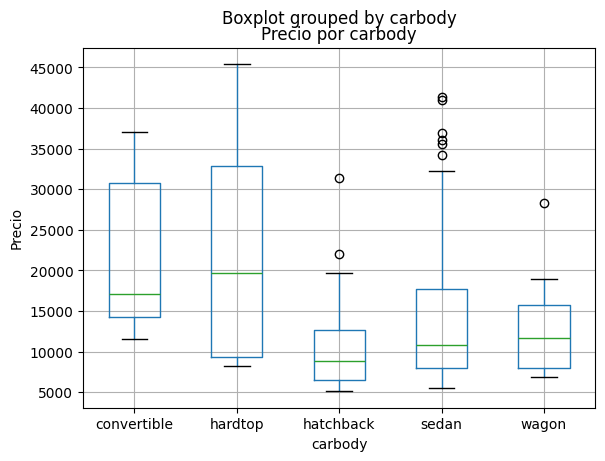

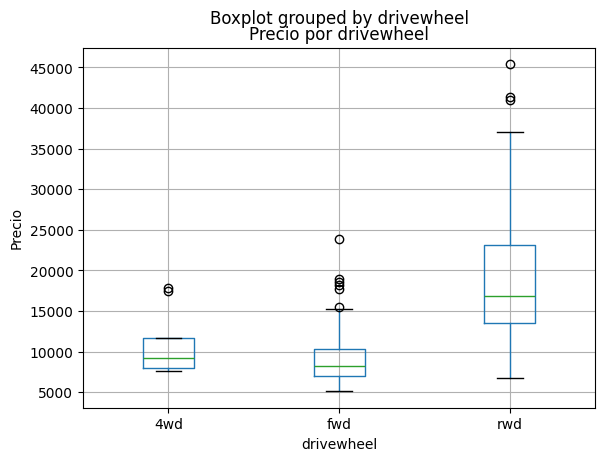

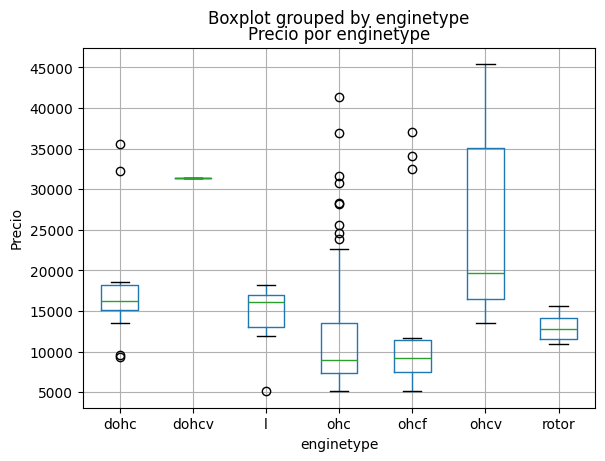

- - - - - - - - - MATRIZ DE CORRELACIÓN - - - - - - - - -

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.64

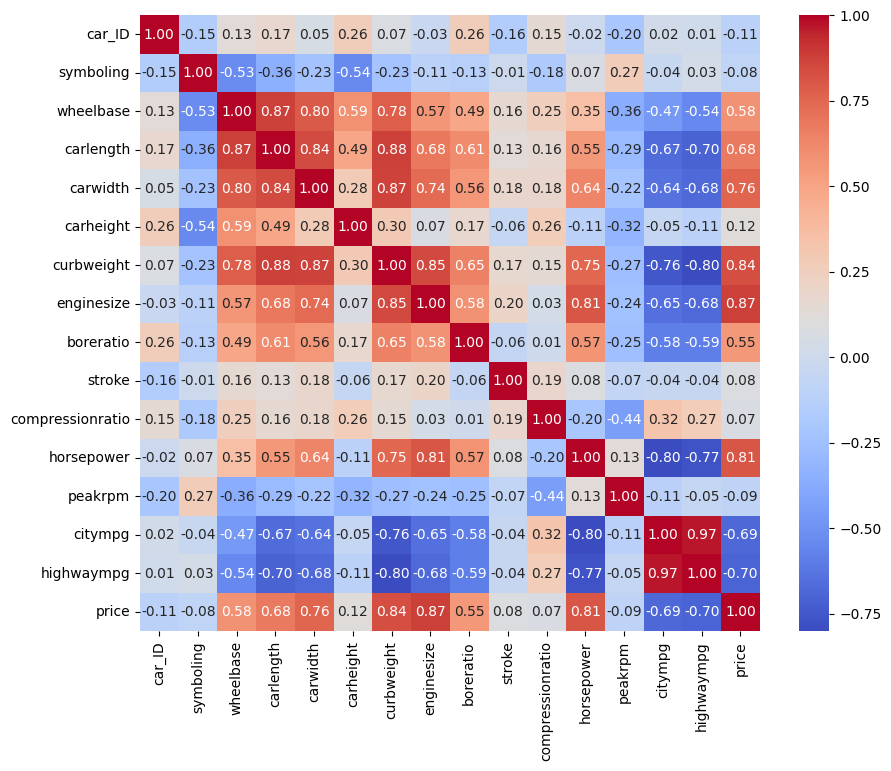

In [17]:
# Distribución de los precios
plt.hist(df['price'])
plt.title("Distribución de los precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Histogramas y diagramas
variables_categoricas = ["fueltype", "carbody", "drivewheel", "enginetype"]
variables_numericas = ["horsepower", "enginesize", "curbweight", "carwidth"]

# Histogramas y bloxpots para variables numéricas
for variable in variables_numericas:
    plt.hist(df[variable])
    plt.title(f"Histograma de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()

    plt.boxplot(df[variable])
    plt.title(f"Boxplot de {variable}")
    plt.ylabel(variable)
    plt.show()

# Boxplots para variables categóricas
for variable in variables_categoricas:
    df.boxplot(column='price', by=variable)
    plt.title(f"Precio por {variable}")
    plt.xlabel(variable)
    plt.ylabel("Precio")
    plt.show()

# Matriz de correlación
corr = df.corr(numeric_only=True)
print(f"- - - - - - - - - MATRIZ DE CORRELACIÓN - - - - - - - - -\n")
print(corr)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

#### **Paso 4: Generar nuevas variables**

* Crea una variable `fueleconomy = 0.55 * citympg + 0.45 * highwaympg`
* Agrupa las compañías por precio medio y clasifícalas como:

  * `Budget` (menos de 10 000 $)
  * `Medium` (10 000 – 20 000 $)
  * `Highend` (más de 20 000 $)


In [18]:
# Nueva variable
df['fueleconomy'] = 0.55 * df['citympg'] + 0.45 * df['highwaympg']

# Precio medio por compañia
precio_medio_por_compañia = df.groupby('Compañia')['price'].mean().reset_index()

def agrupar_compañia(precio):
    if precio < 10000:
        return "Budget"
    elif 10000 <= precio <= 20000:
        return "Medium"
    else:
        return "Highend"

precio_medio_por_compañia['Tipo de precio'] = precio_medio_por_compañia['price'].apply(agrupar_compañia)

# Añadir columna con la clasificación al dataframe
df = df.merge(precio_medio_por_compañia[['Compañia', 'Tipo de precio']], on='Compañia', how='left')

#### **Paso 5: Preparar datos para el modelo**

1. Selecciona las variables más significativas (numéricas + categóricas).
2. Genera **variables dummy** con `pd.get_dummies()` (drop_first=True).
3. Divide en **X** (predictoras) e **y** (precio).
4. Realiza un **train-test split** (70 % – 30 %).
5. Aplica **normalización Min-Max o Z-score** sobre las variables numéricas.


In [19]:
# Variables dummy
variables_categoricas = ["fueltype", "carbody", "drivewheel", "enginetype"]
variables_numericas = ["horsepower", "enginesize", "curbweight", "carwidth"]

df_modelo = pd.get_dummies(df[variables_numericas + variables_categoricas + ['price']], drop_first=True)

# Dividir en X e y
X = df_modelo.drop('price', axis=1)
y = df_modelo['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Normalización Z-score:
# 1. Los modelos de regresión lineal son sensibles a escala
# 2. Z-score centra las variables en "media = 0" y "desviación estandar = 1"
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Paso 6: Entrenamiento del modelo**

In [20]:
# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Precedir sobre el conjunto test
y_pred = modelo.predict(X_test)

#### **Paso 7: Evaluación**

Calcula las métricas:

In [21]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coefficients: ", modelo.coef_)
print("Intercept: ", modelo.intercept_)
print("R² (Coeficiente de determinación):", r2)
print("MSE (Error Cuadrático Medio)", mse)
print("RMSE (Raiz del Error Cuadrático Medio):", rmse)

Coefficients:  [ 1419.42013446  2586.20153477  1563.27611313  2079.89352116
   -36.56714442   569.66406787 -1976.1198011  -1423.59086061
 -1602.04370459  -365.94787665   325.84810155   -60.34928437
  -566.07231878   532.79840229   385.04322762  -328.20767263
   660.71368644]
Intercept:  13408.503496503476
R² (Coeficiente de determinación): 0.7227125639540894
MSE (Error Cuadrático Medio) 19211687.70315523
RMSE (Raiz del Error Cuadrático Medio): 4383.113927695153


Representa la relación entre los valores reales y predichos:


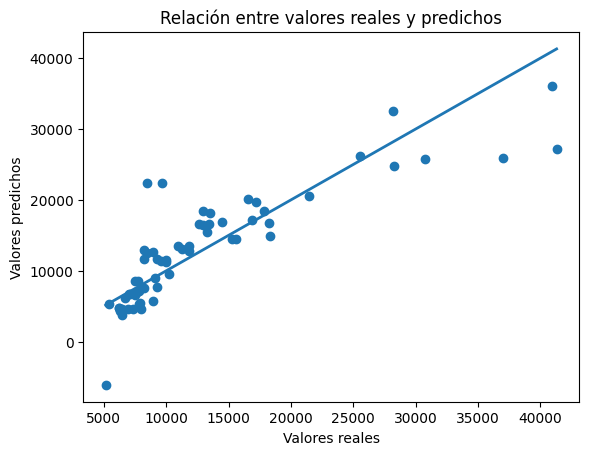

In [22]:
plt.scatter(y_test, y_pred)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2)

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Relación entre valores reales y predichos")
plt.show()

#### **Paso 8: Interpretación**

* Analiza los coeficientes (`lr.coef_`) para identificar qué variables influyen más.
* Comenta qué implicaciones tendría para el negocio (por ejemplo, “aumentar la potencia incrementa el precio, pero reducir el consumo mejora la eficiencia”).

Las variables mas influyentes positivamente son, el peso en vacío, el ancho del coche, los caballos y el tamaño del motor, mientras que de forma negativa, lo que hace que el precio baje, serían los tipos hatchback y wagon en el cuerpo del coche.

El aumentar la potencia y tamaño del motor y un peso y ancho elevado hace que el coche aumente su valor, y hacer el coche hatchback y gasolina haría que el coche sea más barato.

In [23]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': modelo.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Análisis de Coeficientes Estandarizados (Impacto en el Precio):")
print(coefficients_df)

Análisis de Coeficientes Estandarizados (Impacto en el Precio):
              Feature  Coefficient
1          enginesize  2586.201535
3            carwidth  2079.893521
2          curbweight  1563.276113
0          horsepower  1419.420134
16   enginetype_rotor   660.713686
5     carbody_hardtop   569.664068
13     enginetype_ohc   532.798402
14    enginetype_ohcf   385.043228
10     drivewheel_rwd   325.848102
4        fueltype_gas   -36.567144
11   enginetype_dohcv   -60.349284
15    enginetype_ohcv  -328.207673
9      drivewheel_fwd  -365.947877
12       enginetype_l  -566.072319
7       carbody_sedan -1423.590861
8       carbody_wagon -1602.043705
6   carbody_hatchback -1976.119801


#### Extra

- Investigar como exportar el modelo entrenado (`joblib` o `pickle`) para reutilizarlo.

- Investigar como utilizar otros modelos: **Ridge**, **Lasso**, **RandomForestRegressor**.


### Rúbrica

| Criterio                      | Básico (5)                               | Esperado (7–8)                                      | Avanzado (9–10)                                               |
| ----------------------------- | ---------------------------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| Limpieza de datos             | Se corrigen nombres y nulos parcialmente | Dataset correctamente limpio                        | Incluye validaciones y comprobaciones automáticas             |
| Análisis exploratorio         | Usa pocas variables y gráficos simples   | Utiliza varios tipos de gráficos con interpretación | Detecta patrones relevantes y correlaciones significativas    |
| Modelo de regresión           | Modelo básico entrenado                  | Ajusta parámetros, evalúa R² y errores              | Compara varios modelos y justifica selección                  |
| Interpretación y conclusiones | Breves o genéricas                       | Conclusiones razonadas con datos                    | Analiza implicaciones de negocio y mejora                     |
| Presentación del notebook     | Desordenado o sin comentarios            | Bien estructurado y comentado                       | Incluye Markdown, secciones claras y resultados reproducibles |